In [1]:
import os       # using operating system dependent functionality (folders)
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import seaborn


import sys
sys.path.insert(0, '../') # path to functions
from cvasl.file_handler import Config

## Read data into pandas dataframe

How do we define which files should be stitched together?
options:
- all files in folder
- based on suffix (e.g. "n=895_06-Feb-2023_PVC2.tsv")
- check first columns to see whether it matches

For now, I will use the first option

In [2]:
# Identify files
experiment_folder = 'TOP'


config = Config()
root_directory = config.get_directory('raw_data')
tsv_path = os.path.join(root_directory, experiment_folder)

tsv_files = [os.path.join(tsv_path, file) for file in os.listdir(tsv_path) if file.endswith('.tsv')]
tsv_files


['C:/Projects/brainspin/not_pushed/data_anonymized/TOP\\CoV_qCBF_StandardSpace_DeepWM_n=895_06-Feb-2023_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized/TOP\\CoV_qCBF_StandardSpace_Tatu_ACA_MCA_PCA_n=895_06-Feb-2023_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized/TOP\\CoV_qCBF_StandardSpace_Tatu_ACA_MCA_PCA_Prox_Med_Dist_n=895_06-Feb-2023_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized/TOP\\CoV_qCBF_StandardSpace_TotalGM_n=895_06-Feb-2023_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized/TOP\\mean_qCBF_StandardSpace_DeepWM_n=895_06-Feb-2023_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized/TOP\\mean_qCBF_StandardSpace_Tatu_ACA_MCA_PCA_n=895_06-Feb-2023_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized/TOP\\mean_qCBF_StandardSpace_Tatu_ACA_MCA_PCA_Prox_Med_Dist_n=895_06-Feb-2023_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized/TOP\\mean_qCBF_StandardSpace_TotalGM_n=895_06-Feb-2023_PVC2.tsv']

In [3]:
# Read files into dataframes

dataframes = [pd.read_csv(file, sep='\t', header=[0,1], index_col=0) for file in tsv_files]
sample_df = dataframes[0]
cols = sample_df.columns
sample_df


participant_id,session,LongitudinalTimePoint,SubjectNList,Site,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,WMH_vol,WMH_count,DeepWM_B,DeepWM_L,DeepWM_R
StudyID,...,integer,integer,integer,Liter,Liter,Liter,ratio GM/ICV,ratio (GM+WM)/ICV,mL,n lesions (integer),SD/mean,SD/mean,SD/mean
sub-0001_1,ASL_1,1,1,1,0.71736,0.52803,0.31812,0.45881,0.79653,1.743,24.0,8.7620,8.5880,8.9388
sub-0002_1,ASL_1,1,2,1,0.72383,0.62394,0.25673,0.45112,0.83999,1.629,23.0,9.0749,7.6862,10.2840
sub-0005_1,ASL_1,1,3,1,0.71919,0.44499,0.39444,0.46143,0.74693,NaN,NaN,5.0065,5.1959,4.7791
sub-0006_1,ASL_1,1,4,1,0.64079,0.52942,0.27159,0.44444,0.81163,1.631,20.0,8.2278,8.2301,8.0645
sub-0007_1,ASL_1,1,5,1,0.70341,0.52337,0.31289,0.45686,0.79678,0.681,9.0,7.9812,7.7579,8.1308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-1165_1,ASL_1,1,891,1,0.71537,0.48601,0.27123,0.48578,0.81582,1.425,18.0,6.6858,6.3732,7.0912
sub-1166_1,ASL_1,1,892,1,0.68938,0.52763,0.26509,0.46514,0.82114,0.723,18.0,9.9917,10.8378,9.0693
sub-1167_1,ASL_1,1,893,1,0.73473,0.53549,0.35985,0.45074,0.77924,3.935,20.0,4.5665,4.8245,4.3038


## Copy identical columns from any file

we could also read it from the data, but if it's always the same, we can just define it here

In [4]:
# how many identical columns are there in the files?
n_identical = 11  # columns A - L

stitched = sample_df[cols[:n_identical]].copy()
stitched


participant_id,session,LongitudinalTimePoint,SubjectNList,Site,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,WMH_vol,WMH_count
StudyID,...,integer,integer,integer,Liter,Liter,Liter,ratio GM/ICV,ratio (GM+WM)/ICV,mL,n lesions (integer)
sub-0001_1,ASL_1,1,1,1,0.71736,0.52803,0.31812,0.45881,0.79653,1.743,24.0
sub-0002_1,ASL_1,1,2,1,0.72383,0.62394,0.25673,0.45112,0.83999,1.629,23.0
sub-0005_1,ASL_1,1,3,1,0.71919,0.44499,0.39444,0.46143,0.74693,NaN,NaN
sub-0006_1,ASL_1,1,4,1,0.64079,0.52942,0.27159,0.44444,0.81163,1.631,20.0
sub-0007_1,ASL_1,1,5,1,0.70341,0.52337,0.31289,0.45686,0.79678,0.681,9.0
...,...,...,...,...,...,...,...,...,...,...,...
sub-1165_1,ASL_1,1,891,1,0.71537,0.48601,0.27123,0.48578,0.81582,1.425,18.0
sub-1166_1,ASL_1,1,892,1,0.68938,0.52763,0.26509,0.46514,0.82114,0.723,18.0
sub-1167_1,ASL_1,1,893,1,0.73473,0.53549,0.35985,0.45074,0.77924,3.935,20.0


In [5]:
# Would be nice to add a test here to double check that identical columns are actually indentical

## Add unique columns from files

In [6]:
for df in dataframes:
    for col in df.columns[n_identical:]:
        stitched[col] = df[col]

stitched

participant_id,session,LongitudinalTimePoint,SubjectNList,Site,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,WMH_vol,...,PCA_proximal_R,PCA_intermediate_B,PCA_intermediate_L,PCA_intermediate_R,PCA_distal_B,PCA_distal_L,PCA_distal_R,TotalGM_B,TotalGM_L,TotalGM_R
StudyID,...,integer,integer,integer,Liter,Liter,Liter,ratio GM/ICV,ratio (GM+WM)/ICV,mL,...,mL/100g/min,mL/100g/min,mL/100g/min,mL/100g/min,mL/100g/min,mL/100g/min,mL/100g/min,mL/100g/min,mL/100g/min,mL/100g/min
sub-0001_1,ASL_1,1,1,1,0.71736,0.52803,0.31812,0.45881,0.79653,1.743,...,57.7411,65.9906,56.1429,76.2191,83.6050,71.4460,96.2028,60.6981,57.9220,63.8339
sub-0002_1,ASL_1,1,2,1,0.72383,0.62394,0.25673,0.45112,0.83999,1.629,...,60.4720,71.5105,73.7114,69.7295,90.1896,93.3760,85.1374,71.6047,74.1927,68.7649
sub-0005_1,ASL_1,1,3,1,0.71919,0.44499,0.39444,0.46143,0.74693,NaN,...,72.2354,84.4929,86.6735,82.4922,100.5462,105.0117,94.6801,82.4797,82.9234,81.9457
sub-0006_1,ASL_1,1,4,1,0.64079,0.52942,0.27159,0.44444,0.81163,1.631,...,55.3051,61.0346,63.8390,59.1239,66.4437,68.8396,64.2212,63.7201,65.3173,62.0529
sub-0007_1,ASL_1,1,5,1,0.70341,0.52337,0.31289,0.45686,0.79678,0.681,...,78.5647,92.5715,91.9522,93.0762,113.2723,114.2614,112.1711,93.0743,94.7247,91.2521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-1165_1,ASL_1,1,891,1,0.71537,0.48601,0.27123,0.48578,0.81582,1.425,...,65.4647,74.8321,77.6994,72.8863,85.6300,92.9272,79.7285,77.1030,76.9157,77.3044
sub-1166_1,ASL_1,1,892,1,0.68938,0.52763,0.26509,0.46514,0.82114,0.723,...,42.1407,49.1094,48.9355,49.2011,58.2895,59.8466,56.0928,54.5250,55.3724,53.5625
sub-1167_1,ASL_1,1,893,1,0.73473,0.53549,0.35985,0.45074,0.77924,3.935,...,42.9568,49.3340,49.8061,48.8532,67.8209,68.9911,65.9914,54.4204,54.3193,54.5318


## Add sex and age data

In [7]:
sexage_path = os.path.join(root_directory, 'age_data', 'Age_Sex_TOP.csv')
sexage_df = pd.read_csv(sexage_path, index_col=0)
sexage_df




,TP,Sex,Age
ID,,,
sub-0001_1,1,1,43.49
sub-0002_1,1,0,38.30
sub-0019_1,1,1,32.30
sub-0020_1,1,0,21.97
sub-0022_1,1,0,37.52
...,...,...,...
sub-1163_1,1,0,19.06
sub-1165_1,1,0,33.86
sub-1167_1,1,1,33.92


In [8]:
for col in sexage_df[2:]:
    stitched[col] = sexage_df[col]

stitched[['GM_vol', 'Sex', 'Age']]

participant_id,GM_vol,Sex,Age
StudyID,Liter,,
sub-0001_1,0.71736,1.0,43.49
sub-0002_1,0.72383,0.0,38.30
sub-0005_1,0.71919,NaN,NaN
sub-0006_1,0.64079,NaN,NaN
sub-0007_1,0.70341,NaN,NaN
...,...,...,...
sub-1165_1,0.71537,0.0,33.86
sub-1166_1,0.68938,NaN,NaN
sub-1167_1,0.73473,1.0,33.92


## save off file

In [9]:
 
filepath = '../open_work/internal_results/top_stitched.csv' 
stitched.to_csv(filepath)  

# Add some results visualizations

In [10]:
stitched.columns

MultiIndex([(              'session',                 '...'),
            ('LongitudinalTimePoint',             'integer'),
            (         'SubjectNList',             'integer'),
            (                 'Site',             'integer'),
            (               'GM_vol',               'Liter'),
            (               'WM_vol',               'Liter'),
            (              'CSF_vol',               'Liter'),
            (          'GM_ICVRatio',        'ratio GM/ICV'),
            (        'GMWM_ICVRatio',   'ratio (GM+WM)/ICV'),
            (              'WMH_vol',                  'mL'),
            (            'WMH_count', 'n lesions (integer)'),
            (             'DeepWM_B',             'SD/mean'),
            (             'DeepWM_L',             'SD/mean'),
            (             'DeepWM_R',             'SD/mean'),
            (                'ACA_B',             'SD/mean'),
            (                'ACA_L',             'SD/mean'),
        

<AxesSubplot:xlabel='participant_id-StudyID', ylabel='participant_id-StudyID'>

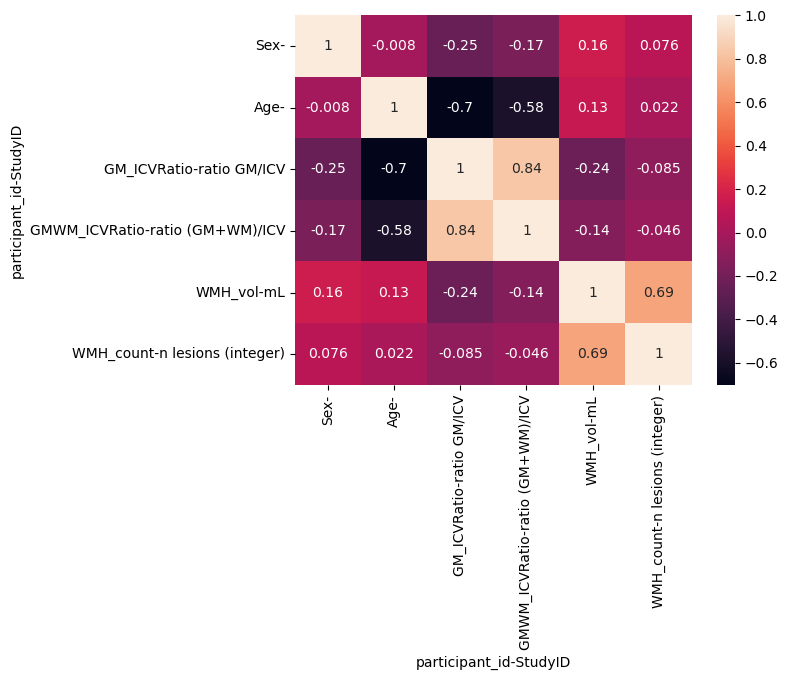

In [11]:
# structural results
seaborn.heatmap(stitched[[ 'Sex', 'Age', 'GM_ICVRatio', 'GMWM_ICVRatio', 'WMH_vol', 'WMH_count']].corr(),  annot = True)

<AxesSubplot:xlabel='participant_id-StudyID', ylabel='participant_id-StudyID'>

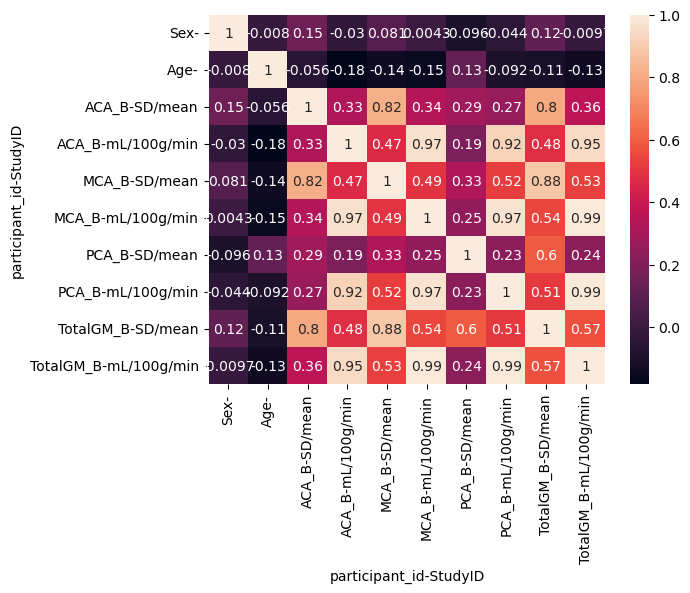

In [12]:
# flow results
seaborn.heatmap(stitched[[ 'Sex', 'Age', 'ACA_B', 'MCA_B', 'PCA_B', 'TotalGM_B']].corr(),  annot = True)

In [13]:
stitched.columns

MultiIndex([(              'session',                 '...'),
            ('LongitudinalTimePoint',             'integer'),
            (         'SubjectNList',             'integer'),
            (                 'Site',             'integer'),
            (               'GM_vol',               'Liter'),
            (               'WM_vol',               'Liter'),
            (              'CSF_vol',               'Liter'),
            (          'GM_ICVRatio',        'ratio GM/ICV'),
            (        'GMWM_ICVRatio',   'ratio (GM+WM)/ICV'),
            (              'WMH_vol',                  'mL'),
            (            'WMH_count', 'n lesions (integer)'),
            (             'DeepWM_B',             'SD/mean'),
            (             'DeepWM_L',             'SD/mean'),
            (             'DeepWM_R',             'SD/mean'),
            (                'ACA_B',             'SD/mean'),
            (                'ACA_L',             'SD/mean'),
        

In [14]:
# function to graph all against a certain one

def throw_graphs(dataframe, special_column):
    dataframe = pd.to_numeric(dataframe)
    all_columns = dataframe.columns
    other_columns = all_columns - special_column
    for column in all_columns:
        column = pd.to_numeric(column)
        plt.scatter(special_column, column)
    

In [30]:
stitched

participant_id,session,LongitudinalTimePoint,SubjectNList,Site,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,WMH_vol,...,PCA_intermediate_R,PCA_distal_B,PCA_distal_L,PCA_distal_R,TotalGM_B,TotalGM_L,TotalGM_R,TP,Sex,Age
StudyID,...,integer,integer,integer,Liter,Liter,Liter,ratio GM/ICV,ratio (GM+WM)/ICV,mL,...,mL/100g/min,mL/100g/min,mL/100g/min,mL/100g/min,mL/100g/min,mL/100g/min,mL/100g/min,,,
sub-0001_1,ASL_1,1,1,1,0.71736,0.52803,0.31812,0.45881,0.79653,1.743,...,76.2191,83.6050,71.4460,96.2028,60.6981,57.9220,63.8339,1.0,1.0,43.49
sub-0002_1,ASL_1,1,2,1,0.72383,0.62394,0.25673,0.45112,0.83999,1.629,...,69.7295,90.1896,93.3760,85.1374,71.6047,74.1927,68.7649,1.0,0.0,38.30
sub-0005_1,ASL_1,1,3,1,0.71919,0.44499,0.39444,0.46143,0.74693,NaN,...,82.4922,100.5462,105.0117,94.6801,82.4797,82.9234,81.9457,NaN,NaN,NaN
sub-0006_1,ASL_1,1,4,1,0.64079,0.52942,0.27159,0.44444,0.81163,1.631,...,59.1239,66.4437,68.8396,64.2212,63.7201,65.3173,62.0529,NaN,NaN,NaN
sub-0007_1,ASL_1,1,5,1,0.70341,0.52337,0.31289,0.45686,0.79678,0.681,...,93.0762,113.2723,114.2614,112.1711,93.0743,94.7247,91.2521,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-1165_1,ASL_1,1,891,1,0.71537,0.48601,0.27123,0.48578,0.81582,1.425,...,72.8863,85.6300,92.9272,79.7285,77.1030,76.9157,77.3044,1.0,0.0,33.86
sub-1166_1,ASL_1,1,892,1,0.68938,0.52763,0.26509,0.46514,0.82114,0.723,...,49.2011,58.2895,59.8466,56.0928,54.5250,55.3724,53.5625,NaN,NaN,NaN
sub-1167_1,ASL_1,1,893,1,0.73473,0.53549,0.35985,0.45074,0.77924,3.935,...,48.8532,67.8209,68.9911,65.9914,54.4204,54.3193,54.5318,1.0,1.0,33.92


In [36]:
y = dataframe['Age']
#print(y.shape)
col=notmain_columns # .to_list()

a = len(col)  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,11))

for i in col:
    print(dataframe[i].shape)
    print(dataframe[i])
    
#     plt.subplot(a, b, c)
#     plt.scatter(dataframe[i][:,0], y)
#     plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
#     plt.xlabel(i)
#     c = c + 1
# fig.tight_layout()
# plt.show()

(895,)
sub-0001_1    ASL_1
sub-0002_1    ASL_1
sub-0005_1    ASL_1
sub-0006_1    ASL_1
sub-0007_1    ASL_1
              ...  
sub-1165_1    ASL_1
sub-1166_1    ASL_1
sub-1167_1    ASL_1
sub-1168_1    ASL_1
sub-1169_1    ASL_1
Name: session, Length: 895, dtype: object
(895,)
sub-0001_1    1
sub-0002_1    1
sub-0005_1    1
sub-0006_1    1
sub-0007_1    1
             ..
sub-1165_1    1
sub-1166_1    1
sub-1167_1    1
sub-1168_1    1
sub-1169_1    1
Name: LongitudinalTimePoint, Length: 895, dtype: int64
(895,)
sub-0001_1      1
sub-0002_1      2
sub-0005_1      3
sub-0006_1      4
sub-0007_1      5
             ... 
sub-1165_1    891
sub-1166_1    892
sub-1167_1    893
sub-1168_1    894
sub-1169_1    895
Name: SubjectNList, Length: 895, dtype: int64
(895,)
sub-0001_1    1
sub-0002_1    1
sub-0005_1    1
sub-0006_1    1
sub-0007_1    1
             ..
sub-1165_1    1
sub-1166_1    1
sub-1167_1    1
sub-1168_1    1
sub-1169_1    1
Name: Site, Length: 895, dtype: int64
(895,)
sub-0001_1    

<Figure size 1000x1100 with 0 Axes>

In [32]:
# notmain_columns.to_list()

In [33]:
dataframe = stitched.copy()
dataframe.columns = dataframe.columns.droplevel(-1)
dataframe

participant_id,session,LongitudinalTimePoint,SubjectNList,Site,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,WMH_vol,...,PCA_intermediate_R,PCA_distal_B,PCA_distal_L,PCA_distal_R,TotalGM_B,TotalGM_L,TotalGM_R,TP,Sex,Age
sub-0001_1,ASL_1,1,1,1,0.71736,0.52803,0.31812,0.45881,0.79653,1.743,...,76.2191,83.6050,71.4460,96.2028,60.6981,57.9220,63.8339,1.0,1.0,43.49
sub-0002_1,ASL_1,1,2,1,0.72383,0.62394,0.25673,0.45112,0.83999,1.629,...,69.7295,90.1896,93.3760,85.1374,71.6047,74.1927,68.7649,1.0,0.0,38.30
sub-0005_1,ASL_1,1,3,1,0.71919,0.44499,0.39444,0.46143,0.74693,NaN,...,82.4922,100.5462,105.0117,94.6801,82.4797,82.9234,81.9457,NaN,NaN,NaN
sub-0006_1,ASL_1,1,4,1,0.64079,0.52942,0.27159,0.44444,0.81163,1.631,...,59.1239,66.4437,68.8396,64.2212,63.7201,65.3173,62.0529,NaN,NaN,NaN
sub-0007_1,ASL_1,1,5,1,0.70341,0.52337,0.31289,0.45686,0.79678,0.681,...,93.0762,113.2723,114.2614,112.1711,93.0743,94.7247,91.2521,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-1165_1,ASL_1,1,891,1,0.71537,0.48601,0.27123,0.48578,0.81582,1.425,...,72.8863,85.6300,92.9272,79.7285,77.1030,76.9157,77.3044,1.0,0.0,33.86
sub-1166_1,ASL_1,1,892,1,0.68938,0.52763,0.26509,0.46514,0.82114,0.723,...,49.2011,58.2895,59.8466,56.0928,54.5250,55.3724,53.5625,NaN,NaN,NaN
sub-1167_1,ASL_1,1,893,1,0.73473,0.53549,0.35985,0.45074,0.77924,3.935,...,48.8532,67.8209,68.9911,65.9914,54.4204,54.3193,54.5318,1.0,1.0,33.92
sub-1168_1,ASL_1,1,894,1,0.71094,0.60974,0.37480,0.41931,0.77894,4.170,...,41.1785,49.5986,51.9290,47.0285,51.4417,52.1897,50.5664,1.0,1.0,45.31


In [34]:
special_column = 'Age'
all_columns = dataframe.columns
notmain = dataframe.drop(special_column, axis=1)
notmain_columns = notmain.columns

In [35]:
notmain_columns

Index(['session', 'LongitudinalTimePoint', 'SubjectNList', 'Site', 'GM_vol',
       'WM_vol', 'CSF_vol', 'GM_ICVRatio', 'GMWM_ICVRatio', 'WMH_vol',
       'WMH_count', 'DeepWM_B', 'DeepWM_L', 'DeepWM_R', 'ACA_B', 'ACA_L',
       'ACA_R', 'MCA_B', 'MCA_L', 'MCA_R', 'PCA_B', 'PCA_L', 'PCA_R',
       'ACA_proximal_B', 'ACA_proximal_L', 'ACA_proximal_R',
       'ACA_intermediate_B', 'ACA_intermediate_L', 'ACA_intermediate_R',
       'ACA_distal_B', 'ACA_distal_L', 'ACA_distal_R', 'MCA_proximal_B',
       'MCA_proximal_L', 'MCA_proximal_R', 'MCA_intermediate_B',
       'MCA_intermediate_L', 'MCA_intermediate_R', 'MCA_distal_B',
       'MCA_distal_L', 'MCA_distal_R', 'PCA_proximal_B', 'PCA_proximal_L',
       'PCA_proximal_R', 'PCA_intermediate_B', 'PCA_intermediate_L',
       'PCA_intermediate_R', 'PCA_distal_B', 'PCA_distal_L', 'PCA_distal_R',
       'TotalGM_B', 'TotalGM_L', 'TotalGM_R', 'DeepWM_B', 'DeepWM_L',
       'DeepWM_R', 'ACA_B', 'ACA_L', 'ACA_R', 'MCA_B', 'MCA_L', 'MCA_R',
     

session is a string


ValueError: x and y must be the same size

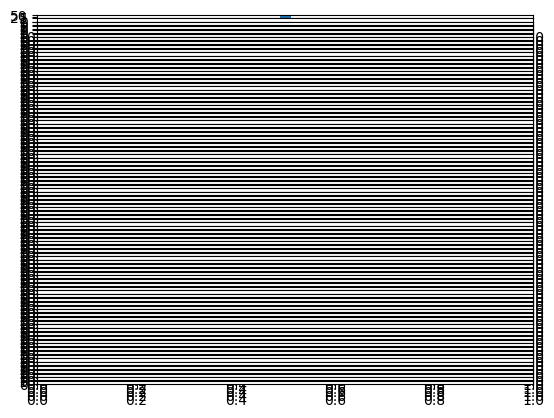

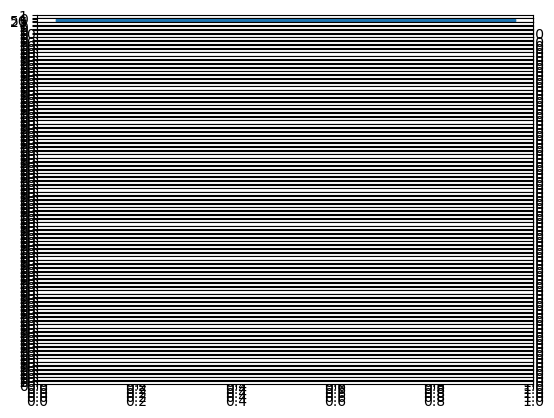

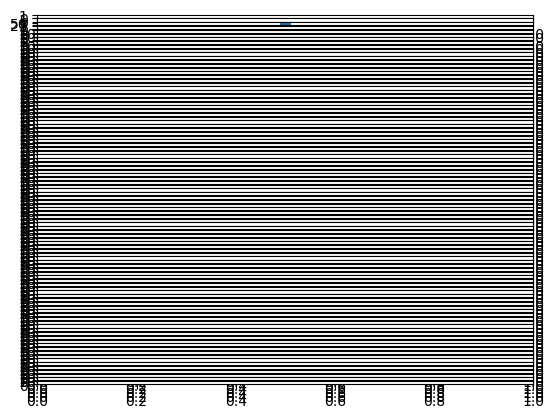

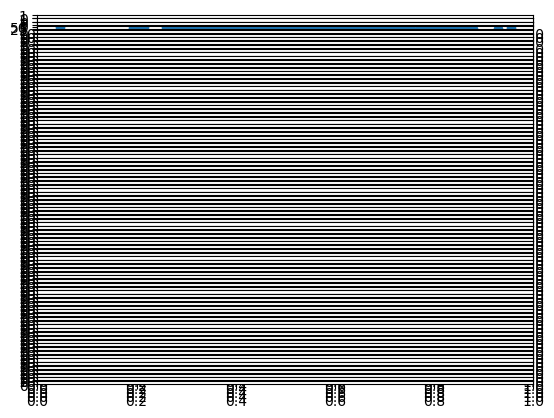

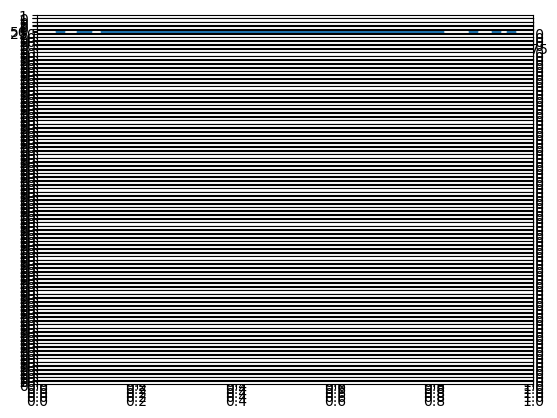

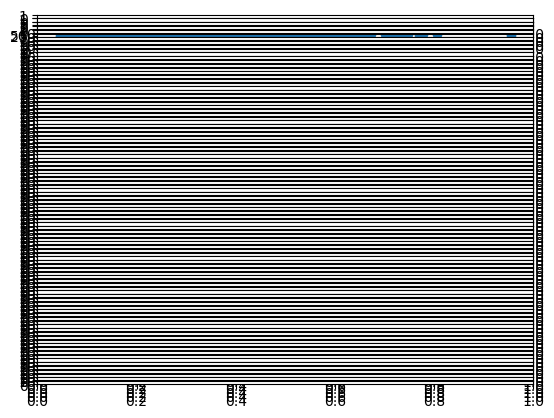

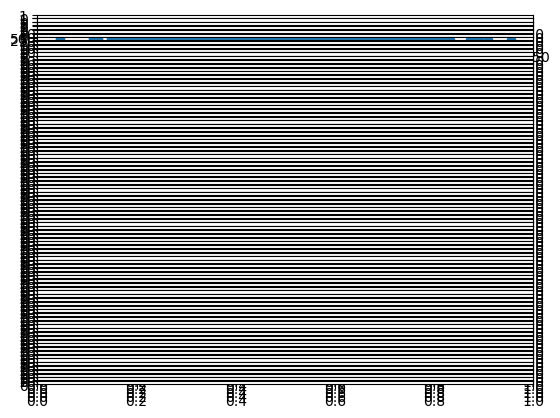

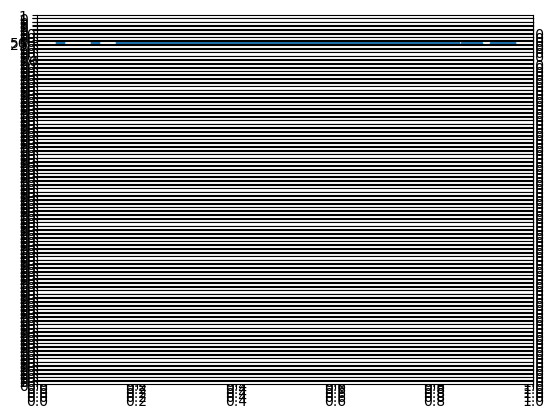

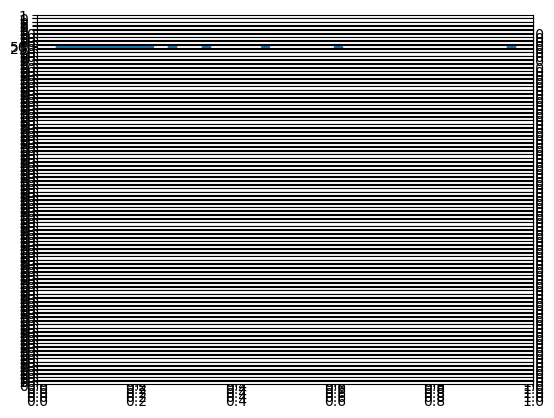

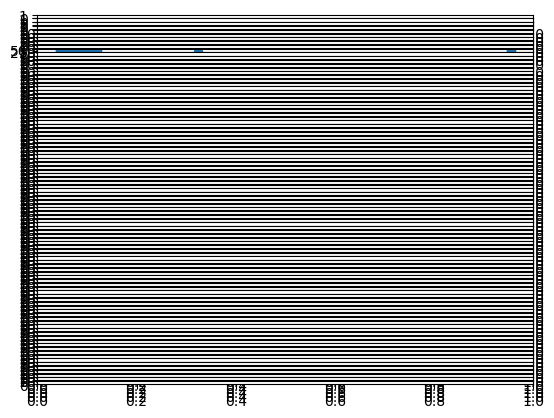

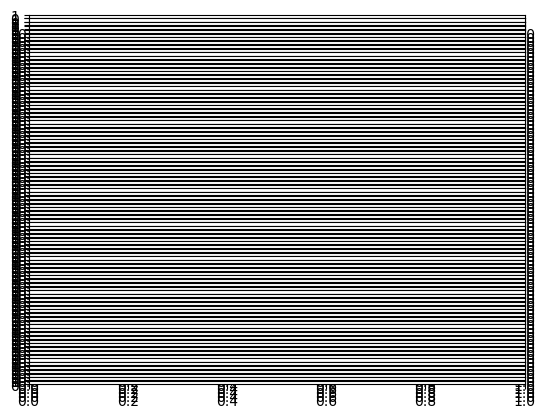

In [26]:
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
dataframe = stitched.copy()
dataframe.columns = dataframe.columns.droplevel(-1)
# #dataframe
special_column = 'Age'
all_columns = dataframe.columns
notmain = dataframe.drop(special_column, axis=1)
notmain_columns = notmain.columns

n = 0
for column in notmain_columns:
    
    if is_string_dtype(dataframe[column]):
        print(column, "is a string")
    else:
        #print(len(dataframe[column]))
        #print(len(dataframe[special_column]))
        
        fig, axs = plt.subplots(len(dataframe.columns))
        #axs[n].scatter(x, y)
        # axs[n].xlabel(column)
        # axs[n].ylabel(special_column)
        axs[n].scatter(dataframe[column],dataframe[special_column])
        plt. savefig(("versus"+column +".png")) 
        n +=1
        

In [ ]:
for c in dataframe.columns:
    print(len(dataframe[c]))

In [ ]:
dataframe[special_column]

In [ ]:
dataframe['Sex']